# Healthcare Dataset - EDA and Preprocessing Analysis

## Proje Amacı
Bu notebook'ta `Talent_Academy_Case_DT_2025.xlsx` dosyasındaki sağlık verisi üzerinde kapsamlı EDA (Exploratory Data Analysis) ve veri ön işleme yapacağız.

**Hedef Değişken:** `TedaviSuresi` (Treatment Duration)

**Amacımız:** Modeli eğitimine hazır hale getirmek (model eğitmek değil)

## Adımlar:
1. Veri analizi (numeric ve categorical veri tespiti)
2. Korelasyon haritası
3. Gereksiz veri tespiti
4. Boş veri doldurma (ortalama değerlerle)
5. Categorical veri encoding
6. Veri karıştırma ve train-test split (75-25)

In [50]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


## 1. Kütüphanelerin İçe Aktarılması

In [51]:
# Gerekli kütüphaneleri içe aktarma
import numpy as np
import pandas as pd

# Matplotlib ve seaborn'u otomatik yükle
try:
    import matplotlib.pyplot as plt
    import seaborn as sns
except ImportError:
    !pip install matplotlib seaborn
    import matplotlib.pyplot as plt
    import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import warnings
warnings.filterwarnings('ignore')

# Görselleştirme ayarları
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

print("Kütüphaneler başarıyla yüklendi!")

Kütüphaneler başarıyla yüklendi!


## 2. Veri Yükleme ve İlk İnceleme

In [52]:
# Veriyi yükleme
df = pd.read_excel('Talent_Academy_Case_DT_2025.xlsx')

print("Veri başarıyla yüklendi!")
print(f"Veri boyutu: {df.shape}")
print(f"Satır sayısı: {df.shape[0]}")
print(f"Sütun sayısı: {df.shape[1]}")

Veri başarıyla yüklendi!
Veri boyutu: (2235, 13)
Satır sayısı: 2235
Sütun sayısı: 13


In [53]:
# Sütun adlarını görüntüleme
print("Sütun Adları:")
print(df.columns.tolist())

Sütun Adları:
['HastaNo', 'Yas', 'Cinsiyet', 'KanGrubu', 'Uyruk', 'KronikHastalik', 'Bolum', 'Alerji', 'Tanilar', 'TedaviAdi', 'TedaviSuresi', 'UygulamaYerleri', 'UygulamaSuresi']


In [54]:
# İlk 5 satırı görüntüleme
print("İlk 5 satır:")
df.head()

İlk 5 satır:


,HastaNo,Yas,Cinsiyet,KanGrubu,Uyruk,KronikHastalik,Bolum,Alerji,Tanilar,TedaviAdi,TedaviSuresi,UygulamaYerleri,UygulamaSuresi
0,145134,60,Kadın,0 Rh+,Türkiye,"Becker Musküler Distrofisi, Hiportiroidizm, Ka...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",TOZ,Ayak bileği ve ayağın yüzeysel yaralanması,Ayak Bileği,5 Seans,Ayak Bileği,20 Dakika
1,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,Boyun,20 Dakika
2,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,"Boyun,Sırt",20 Dakika
3,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,Boyun,5 Dakika
4,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,"Boyun,Sırt",20 Dakika


In [55]:
# Temel bilgiler
print("Veri Hakkında Temel Bilgiler:")
df.info()

Veri Hakkında Temel Bilgiler:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2235 entries, 0 to 2234
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   HastaNo          2235 non-null   int64 
 1   Yas              2235 non-null   int64 
 2   Cinsiyet         2066 non-null   object
 3   KanGrubu         1560 non-null   object
 4   Uyruk            2235 non-null   object
 5   KronikHastalik   1624 non-null   object
 6   Bolum            2224 non-null   object
 7   Alerji           1291 non-null   object
 8   Tanilar          2160 non-null   object
 9   TedaviAdi        2235 non-null   object
 10  TedaviSuresi     2235 non-null   object
 11  UygulamaYerleri  2014 non-null   object
 12  UygulamaSuresi   2235 non-null   object
dtypes: int64(2), object(11)
memory usage: 227.1+ KB


In [56]:
# İstatistiksel özet
print("Numerik Değişkenler İçin İstatistiksel Özet:")
df.describe()

Numerik Değişkenler İçin İstatistiksel Özet:


,HastaNo,Yas
count,2235.000000,2235.000000
mean,145333.100224,47.327069
std,115.214248,15.208634
min,145134.000000,2.000000
25%,145235.000000,38.000000
50%,145331.000000,46.000000
75%,145432.000000,56.000000
max,145537.000000,92.000000


## 4. Eksik Veri Analizi


In [57]:
# Eksik veri analizi
missing_data = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

missing_df = pd.DataFrame({
    'Sütun': df.columns,
    'Eksik_Veri_Sayısı': missing_data.values,
    'Eksik_Veri_Yüzdesi': missing_percentage.values
})

missing_df = missing_df[missing_df['Eksik_Veri_Sayısı'] > 0].sort_values('Eksik_Veri_Sayısı', ascending=False)

print('Eksik Veri Analizi:')
if len(missing_df) > 0:
    display(missing_df)
else:
    print('Hiç eksik veri bulunmamaktadır!')

print(f'\nToplam eksik veri sayısı: {df.isnull().sum().sum()}')

Eksik Veri Analizi:


,Sütun,Eksik_Veri_Sayısı,Eksik_Veri_Yüzdesi
7,Alerji,944,42.237136
3,KanGrubu,675,30.201342
5,KronikHastalik,611,27.337808
11,UygulamaYerleri,221,9.888143
2,Cinsiyet,169,7.561521
8,Tanilar,75,3.355705
6,Bolum,11,0.492170



Toplam eksik veri sayısı: 2706


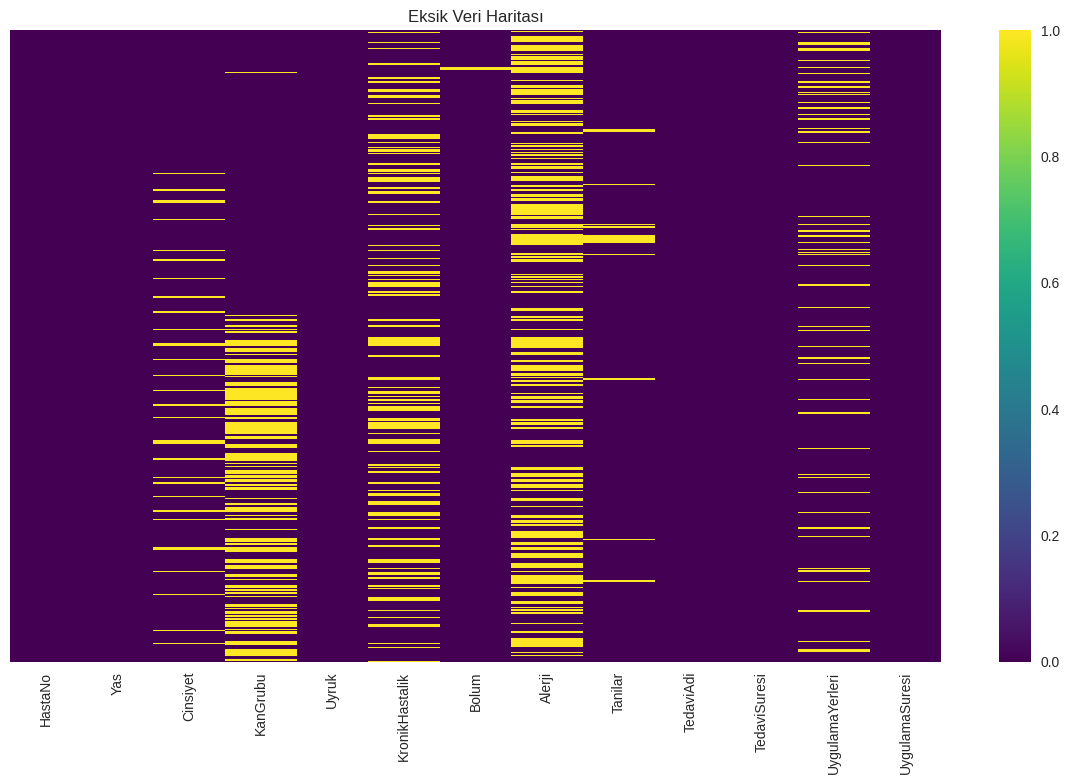

In [58]:
# Eksik veri görselleştirmesi
if df.isnull().sum().sum() > 0:
    plt.figure(figsize=(12, 8))
    sns.heatmap(df.isnull(), yticklabels=False, cbar=True, cmap='viridis')
    plt.title('Eksik Veri Haritası')
    plt.tight_layout()
    plt.show()
else:
    print('Eksik veri olmadığı için heatmap çizilmedi.')

In [59]:
# TedaviSuresi sütununu temizle
print("TedaviSuresi sütunu temizlenmeden önce:")
print(df['TedaviSuresi'].value_counts().head(10))

# String değerleri temizle ve sayısal hale getir
def clean_treatment_duration(value):
    if pd.isna(value):
        return value
    
    # String ise sayısal kısmı çıkar
    if isinstance(value, str):
        # "5 Seans" gibi değerlerden sadece sayıyı al
        import re
        numbers = re.findall(r'\d+', str(value))
        if numbers:
            return float(numbers[0])  # İlk sayıyı al
        else:
            return np.nan
    
    return float(value)

# Temizleme işlemini uygula
df['TedaviSuresi'] = df['TedaviSuresi'].apply(clean_treatment_duration)

print("\nTedaviSuresi sütunu temizlendikten sonra:")
print(f"Veri tipi: {df['TedaviSuresi'].dtype}")
print(f"Benzersiz değer sayısı: {df['TedaviSuresi'].nunique()}")
print(f"İlk 10 değer: {df['TedaviSuresi'].head(10).tolist()}")

TedaviSuresi sütunu temizlenmeden önce:
TedaviSuresi
15 Seans    1670
10 Seans     175
20 Seans     113
2 Seans       45
17 Seans      36
4 Seans       35
16 Seans      27
18 Seans      20
21 Seans      20
5 Seans       17
Name: count, dtype: int64

TedaviSuresi sütunu temizlendikten sonra:
Veri tipi: float64
Benzersiz değer sayısı: 23
İlk 10 değer: [5.0, 15.0, 15.0, 15.0, 15.0, 15.0, 10.0, 10.0, 10.0, 15.0]


## 5. Hedef Değişken (TedaviSuresi) Analizi


In [60]:
# Hedef değişken analizi
target_col = 'TedaviSuresi'

print(f'Hedef Değişken: {target_col}')
print(f'Veri tipi: {df[target_col].dtype}')
print(f'Benzersiz değer sayısı: {df[target_col].nunique()}')
print(f'Min değer: {df[target_col].min()}')
print(f'Max değer: {df[target_col].max()}')
print(f'Ortalama: {df[target_col].mean():.2f}')
print(f'Medyan: {df[target_col].median():.2f}')
print(f'Standart sapma: {df[target_col].std():.2f}')

Hedef Değişken: TedaviSuresi
Veri tipi: float64
Benzersiz değer sayısı: 23
Min değer: 1.0
Max değer: 37.0
Ortalama: 14.57
Medyan: 15.00
Standart sapma: 3.73


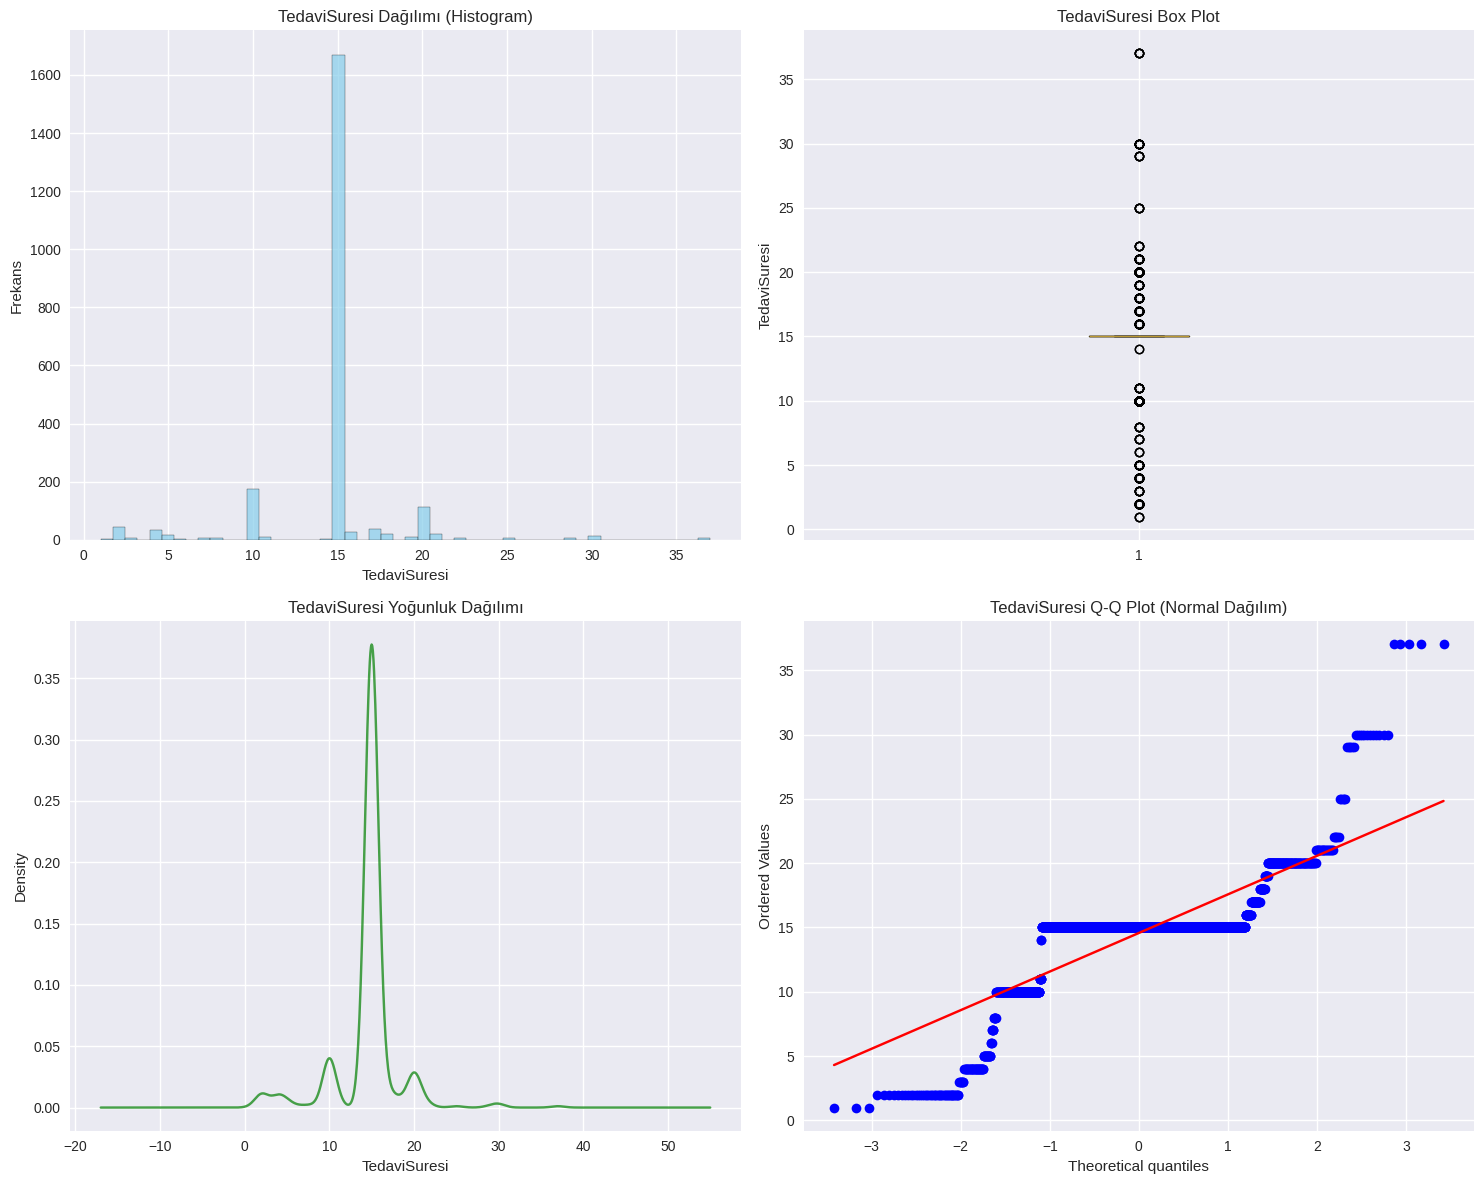

In [61]:
# Hedef değişken dağılımı görselleştirmesi
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Histogram
axes[0, 0].hist(df[target_col], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].set_title(f'{target_col} Dağılımı (Histogram)')
axes[0, 0].set_xlabel(target_col)
axes[0, 0].set_ylabel('Frekans')

# Box plot
axes[0, 1].boxplot(df[target_col])
axes[0, 1].set_title(f'{target_col} Box Plot')
axes[0, 1].set_ylabel(target_col)

# Density plot
df[target_col].plot(kind='density', ax=axes[1, 0], color='green', alpha=0.7)
axes[1, 0].set_title(f'{target_col} Yoğunluk Dağılımı')
axes[1, 0].set_xlabel(target_col)

# Q-Q plot (normal dağılım kontrolü)
from scipy import stats
stats.probplot(df[target_col], dist='norm', plot=axes[1, 1])
axes[1, 1].set_title(f'{target_col} Q-Q Plot (Normal Dağılım)')

plt.tight_layout()
plt.show()

## 6. Korelasyon Analizi

In [63]:
# Numerik ve kategorik sütunları belirle
numeric_columns = []
categorical_columns = []

for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        numeric_columns.append(col)
    else:
        categorical_columns.append(col)

print(f"Numerik sütunlar ({len(numeric_columns)}): {numeric_columns}")
print(f"Kategorik sütunlar ({len(categorical_columns)}): {categorical_columns}")

Numerik sütunlar (3): ['HastaNo', 'Yas', 'TedaviSuresi']
Kategorik sütunlar (10): ['Cinsiyet', 'KanGrubu', 'Uyruk', 'KronikHastalik', 'Bolum', 'Alerji', 'Tanilar', 'TedaviAdi', 'UygulamaYerleri', 'UygulamaSuresi']


In [64]:
# Korelasyon matrisi hesaplama (sadece numerik sütunlar için)
if len(numeric_columns) > 1:
    correlation_matrix = df[numeric_columns].corr()
    
    print('Korelasyon Matrisi:')
    display(correlation_matrix)
    
    # Hedef değişken ile diğer değişkenler arasındaki korelasyon
    if target_col in numeric_columns:
        target_correlations = correlation_matrix[target_col].drop(target_col).sort_values(key=abs, ascending=False)
        print(f'\n{target_col} ile diğer değişkenler arasındaki korelasyon:')
        for var, corr in target_correlations.items():
            print(f'  {var}: {corr:.3f}')
else:
    print('Korelasyon analizi için yeterli numerik sütun bulunmamaktadır.')

Korelasyon Matrisi:


,HastaNo,Yas,TedaviSuresi
HastaNo,1.000000,-0.300964,0.051848
Yas,-0.300964,1.000000,-0.013252
TedaviSuresi,0.051848,-0.013252,1.000000



TedaviSuresi ile diğer değişkenler arasındaki korelasyon:
  HastaNo: 0.052
  Yas: -0.013


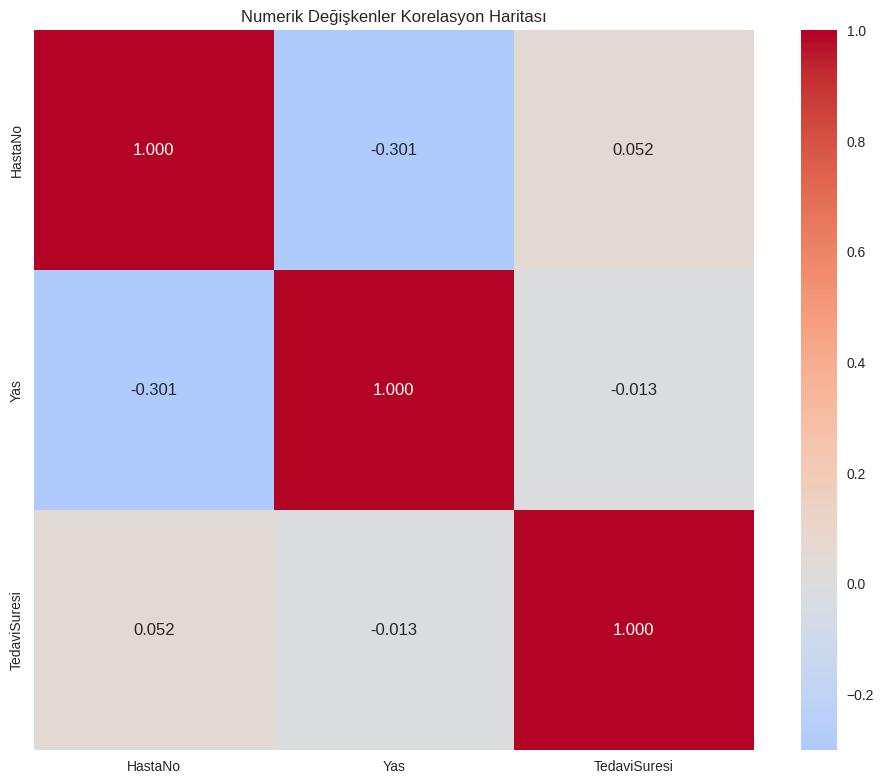


Yüksek korelasyonlu değişken çifti bulunamadı.


In [65]:
# Korelasyon heatmap'i
if len(numeric_columns) > 1:
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, 
                annot=True, 
                cmap='coolwarm', 
                center=0,
                square=True,
                fmt='.3f')
    plt.title('Numerik Değişkenler Korelasyon Haritası')
    plt.tight_layout()
    plt.show()
    
    # Yüksek korelasyonlu çiftleri bul
    high_corr_pairs = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            corr_val = correlation_matrix.iloc[i, j]
            if abs(corr_val) > 0.7:
                high_corr_pairs.append((correlation_matrix.columns[i], 
                                      correlation_matrix.columns[j], 
                                      corr_val))
    
    if high_corr_pairs:
        print('\nYüksek Korelasyonlu Değişken Çiftleri (|r| > 0.7):')
        for var1, var2, corr in high_corr_pairs:
            print(f'  {var1} - {var2}: {corr:.3f}')
    else:
        print('\nYüksek korelasyonlu değişken çifti bulunamadı.')
else:
    print('Korelasyon heatmap\'i için yeterli numerik sütun bulunmamaktadır.')

## 7. Gereksiz Veri Tespiti ve Temizleme

In [66]:
# Gereksiz veri tespiti
print('Gereksiz Veri Tespiti:')

# 1. Tek değerli sütunlar (sabit sütunlar)
constant_columns = []
for col in df.columns:
    if df[col].nunique() == 1:
        constant_columns.append(col)

if constant_columns:
    print(f'\n1. Sabit değerli sütunlar (silinebilir): {constant_columns}')
else:
    print('\n1. Sabit değerli sütun bulunamadı.')

# 2. ID sütunu tespiti (HastaNo gibi)
id_columns = []
for col in df.columns:
    if 'id' in col.lower() or 'no' in col.lower():
        if df[col].nunique() == len(df):  # Her satır için farklı değer
            id_columns.append(col)

if id_columns:
    print(f'\n2. ID sütunları (modelleme için gereksiz olabilir): {id_columns}')
else:
    print('\n2. ID sütunu bulunamadı.')

# 3. Çok fazla benzersiz değeri olan kategorik sütunlar
high_cardinality_columns = []
for col in categorical_columns:
    unique_ratio = df[col].nunique() / len(df)
    if unique_ratio > 0.5:  # Verilerin %50'sinden fazlası benzersiz
        high_cardinality_columns.append((col, df[col].nunique(), unique_ratio))

if high_cardinality_columns:
    print('\n3. Yüksek kardinaliteli kategorik sütunlar:')
    for col, unique_count, ratio in high_cardinality_columns:
        print(f'  {col}: {unique_count} benzersiz değer (%{ratio*100:.1f})')
else:
    print('\n3. Yüksek kardinaliteli kategorik sütun bulunamadı.')

Gereksiz Veri Tespiti:

1. Sabit değerli sütun bulunamadı.

2. ID sütunu bulunamadı.

3. Yüksek kardinaliteli kategorik sütun bulunamadı.


## 8. Eksik Veri Doldurma (Ortalama Değerlerle)

In [67]:
# Orijinal veriyi kopyalama (güvenlik için)
df_processed = df.copy()

print('Eksik Veri Doldurma İşlemi:')
print(f'İşlem öncesi eksik veri sayısı: {df_processed.isnull().sum().sum()}')

# Numerik sütunlardaki eksik değerleri ortalama ile doldurma
for col in numeric_columns:
    if df_processed[col].isnull().sum() > 0:
        mean_value = df_processed[col].mean()
        missing_count = df_processed[col].isnull().sum()
        df_processed[col].fillna(mean_value, inplace=True)
        print(f'  {col}: {missing_count} eksik değer ortalama ({mean_value:.2f}) ile dolduruldu')

# Kategorik sütunlardaki eksik değerleri mod (en sık görülen değer) ile doldurma
for col in categorical_columns:
    if df_processed[col].isnull().sum() > 0:
        mode_value = df_processed[col].mode()[0] if not df_processed[col].mode().empty else 'Bilinmiyor'
        missing_count = df_processed[col].isnull().sum()
        df_processed[col].fillna(mode_value, inplace=True)
        print(f'  {col}: {missing_count} eksik değer mod ({mode_value}) ile dolduruldu')

print(f'\nİşlem sonrası eksik veri sayısı: {df_processed.isnull().sum().sum()}')
print('Eksik veri doldurma işlemi tamamlandı!')

Eksik Veri Doldurma İşlemi:
İşlem öncesi eksik veri sayısı: 2706
  Cinsiyet: 169 eksik değer mod (Kadın) ile dolduruldu
  KanGrubu: 675 eksik değer mod (0 Rh+) ile dolduruldu
  KronikHastalik: 611 eksik değer mod (Myastenia gravis) ile dolduruldu
  Bolum: 11 eksik değer mod (Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi) ile dolduruldu
  Alerji: 944 eksik değer mod (Polen) ile dolduruldu
  Tanilar: 75 eksik değer mod (DORSALJİ, DİĞER, LUMBOSAKRAL BÖLGE) ile dolduruldu
  UygulamaYerleri: 221 eksik değer mod (Bel) ile dolduruldu

İşlem sonrası eksik veri sayısı: 0
Eksik veri doldurma işlemi tamamlandı!


## 9. Kategorik Veri Encoding

In [68]:
# Encoding stratejisi belirleme
print('Kategorik Veri Encoding Stratejisi:')

# Düşük kardinaliteli sütunlar için One-Hot Encoding
# Yüksek kardinaliteli sütunlar için Label Encoding

low_cardinality_cols = []
high_cardinality_cols = []

for col in categorical_columns:
    unique_count = df_processed[col].nunique()
    if unique_count <= 10:  # 10 veya daha az benzersiz değer
        low_cardinality_cols.append(col)
    else:
        high_cardinality_cols.append(col)

print(f'\nOne-Hot Encoding uygulanacak sütunlar ({len(low_cardinality_cols)}): {low_cardinality_cols}')
print(f'Label Encoding uygulanacak sütunlar ({len(high_cardinality_cols)}): {high_cardinality_cols}')

Kategorik Veri Encoding Stratejisi:

One-Hot Encoding uygulanacak sütunlar (5): ['Cinsiyet', 'KanGrubu', 'Uyruk', 'Bolum', 'UygulamaSuresi']
Label Encoding uygulanacak sütunlar (5): ['KronikHastalik', 'Alerji', 'Tanilar', 'TedaviAdi', 'UygulamaYerleri']


In [70]:
# Label Encoding uygulama
label_encoders = {}

for col in high_cardinality_cols:
    le = LabelEncoder()
    df_processed[f'{col}_encoded'] = le.fit_transform(df_processed[col])
    label_encoders[col] = le
    print(f'{col} -> {col}_encoded (Label Encoding)')
    print(f'  Benzersiz değer sayısı: {df_processed[col].nunique()}')
    print(f'  Örnek mapping: {dict(zip(le.classes_[:5], le.transform(le.classes_[:5])))}')  # İlk 5 değer
    print()

# One-Hot Encoding uygulama
if low_cardinality_cols:
    df_encoded = pd.get_dummies(df_processed, columns=low_cardinality_cols, prefix=low_cardinality_cols)
    print(f'One-Hot Encoding uygulandı: {low_cardinality_cols}')
    print(f'Yeni sütun sayısı: {df_encoded.shape[1]} (önceki: {df_processed.shape[1]})')
else:
    df_encoded = df_processed.copy()
    print('One-Hot Encoding uygulanacak sütun bulunamadı.')


# Mevcut sütunları kontrol et ve sadece var olanları kaldır
existing_categorical_columns = [col for col in categorical_columns if col in df_encoded.columns]
columns_to_drop = existing_categorical_columns

print(f"Kaldırılacak sütunlar: {columns_to_drop}")
print(f"Mevcut sütunlar: {df_encoded.columns.tolist()}")

if columns_to_drop:
    df_final = df_encoded.drop(columns=columns_to_drop)
    print(f"Kaldırılan sütunlar: {columns_to_drop}")
else:
    df_final = df_encoded.copy()
    print("Kaldırılacak sütun bulunamadı.")

print(f"\nFinal veri boyutu: {df_final.shape}")

KronikHastalik -> KronikHastalik_encoded (Label Encoding)
  Benzersiz değer sayısı: 220
  Örnek mapping: {'Aritmi': np.int64(0), 'Aritmi, Astım, Becker Musküler Distrofisi': np.int64(1), 'Aritmi, Astım, Duchenne Musküler Distrofisi': np.int64(2), 'Aritmi, Astım, Fascioscapulohumeral Distrofi, Diyabet': np.int64(3), 'Aritmi, Becker Musküler Distrofisi, Duchenne Musküler Distrofisi': np.int64(4)}

Alerji -> Alerji_encoded (Label Encoding)
  Benzersiz değer sayısı: 38
  Örnek mapping: {'ARVELES,CORASPIN': np.int64(0), 'GRIPIN': np.int64(1), 'GRİPİN': np.int64(2), 'NOVALGIN': np.int64(3), 'NOVALGIN,Novalgin': np.int64(4)}

Tanilar -> Tanilar_encoded (Label Encoding)
  Benzersiz değer sayısı: 367
  Örnek mapping: {"'DORSALJİ, DİĞER, LUMBOSAKRAL BÖLGE,Lateral epikondilit": np.int64(0), 'ARTİKÜLER KIKIRDAK DİĞER BOZUKLUKLARI, OMUZ BÖLGESİ,Omuzun darbe sendromu': np.int64(1), 'Algonörodistrofi': np.int64(2), 'Algonörodistrofi,Ayak kırığı, ayak bileği hariç': np.int64(3), 'Algonörodistrofi,\xa0

In [71]:
# Final dataset bilgileri
print('Final Dataset Bilgileri:')
print(f'Boyut: {df_final.shape}')
print(f'Sütunlar: {df_final.columns.tolist()}')
print(f'\nVeri tipleri:')
print(df_final.dtypes)
print(f'\nEksik veri kontrolü: {df_final.isnull().sum().sum()} (olmalı: 0)')

Final Dataset Bilgileri:
Boyut: (2235, 43)
Sütunlar: ['HastaNo', 'Yas', 'TedaviSuresi', 'KronikHastalik_encoded', 'Alerji_encoded', 'Tanilar_encoded', 'TedaviAdi_encoded', 'UygulamaYerleri_encoded', 'Cinsiyet_Erkek', 'Cinsiyet_Kadın', 'KanGrubu_0 Rh+', 'KanGrubu_0 Rh-', 'KanGrubu_A Rh+', 'KanGrubu_A Rh-', 'KanGrubu_AB Rh+', 'KanGrubu_AB Rh-', 'KanGrubu_B Rh+', 'KanGrubu_B Rh-', 'Uyruk_Arnavutluk', 'Uyruk_Azerbaycan', 'Uyruk_Libya', 'Uyruk_Tokelau', 'Uyruk_Türkiye', 'Bolum_Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi', 'Bolum_Genel Cerrahi', 'Bolum_Göğüs Hastalıkları', 'Bolum_Kalp Ve Damar Cerrahisi', 'Bolum_Kardiyoloji', 'Bolum_Laboratuar', 'Bolum_Nöroloji', 'Bolum_Ortopedi Ve Travmatoloji', 'Bolum_Tıbbi Onkoloji', 'Bolum_İç Hastalıkları', 'UygulamaSuresi_10 Dakika', 'UygulamaSuresi_15 Dakika', 'UygulamaSuresi_20 Dakika', 'UygulamaSuresi_25 Dakika', 'UygulamaSuresi_3 Dakika', 'UygulamaSuresi_30 Dakika', 'UygulamaSuresi_40 Dakika', 'UygulamaSuresi_45 Dakika', 'UygulamaSuresi_5 Dakika'

## 10. Veri Normalizasyonu ve Standartlaştırma

In [72]:
# Numerik sütunları belirleme (hedef değişken hariç)
target_col = 'TedaviSuresi'
numeric_features = [col for col in df_final.columns if df_final[col].dtype in ['int64', 'float64'] and col != target_col]

print(f'Standartlaştırılacak numerik özellikler: {numeric_features}')
print(f'Hedef değişken: {target_col}')

# StandardScaler ile standartlaştırma
scaler = StandardScaler()
df_scaled = df_final.copy()

if numeric_features:
    df_scaled[numeric_features] = scaler.fit_transform(df_final[numeric_features])
    print('\nStandartlaştırma tamamlandı!')
    
    # Standartlaştırma öncesi ve sonrası karşılaştırma
    print('\nStandartlaştırma Öncesi vs Sonrası:')
    for col in numeric_features[:3]:  # İlk 3 sütun için örnek
        print(f'\n{col}:')
        print(f'  Öncesi - Ortalama: {df_final[col].mean():.2f}, Std: {df_final[col].std():.2f}')
        print(f'  Sonrası - Ortalama: {df_scaled[col].mean():.2f}, Std: {df_scaled[col].std():.2f}')
else:
    print('Standartlaştırılacak numerik özellik bulunamadı.')

Standartlaştırılacak numerik özellikler: ['HastaNo', 'Yas', 'KronikHastalik_encoded', 'Alerji_encoded', 'Tanilar_encoded', 'TedaviAdi_encoded', 'UygulamaYerleri_encoded']
Hedef değişken: TedaviSuresi

Standartlaştırma tamamlandı!

Standartlaştırma Öncesi vs Sonrası:

HastaNo:
  Öncesi - Ortalama: 145333.10, Std: 115.21
  Sonrası - Ortalama: 0.00, Std: 1.00

Yas:
  Öncesi - Ortalama: 47.33, Std: 15.21
  Sonrası - Ortalama: -0.00, Std: 1.00

KronikHastalik_encoded:
  Öncesi - Ortalama: 130.30, Std: 62.07
  Sonrası - Ortalama: 0.00, Std: 1.00


## 11. Veri Karıştırma ve Train-Test Split (75-25)

In [73]:
# Özellikler ve hedef değişken ayrımı
X = df_scaled.drop(columns=[target_col])
y = df_scaled[target_col]

print(f'Özellik matrisi (X) boyutu: {X.shape}')
print(f'Hedef değişken (y) boyutu: {y.shape}')
print(f'\nÖzellik sütunları: {X.columns.tolist()}')

# Train-Test split (75% train, 25% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.25, 
    random_state=42, 
    shuffle=True
)

print(f'\nTrain-Test Split Sonuçları:')
print(f'X_train boyutu: {X_train.shape} ({X_train.shape[0]/len(X)*100:.1f}%)')
print(f'X_test boyutu: {X_test.shape} ({X_test.shape[0]/len(X)*100:.1f}%)')
print(f'y_train boyutu: {y_train.shape}')
print(f'y_test boyutu: {y_test.shape}')

Özellik matrisi (X) boyutu: (2235, 42)
Hedef değişken (y) boyutu: (2235,)

Özellik sütunları: ['HastaNo', 'Yas', 'KronikHastalik_encoded', 'Alerji_encoded', 'Tanilar_encoded', 'TedaviAdi_encoded', 'UygulamaYerleri_encoded', 'Cinsiyet_Erkek', 'Cinsiyet_Kadın', 'KanGrubu_0 Rh+', 'KanGrubu_0 Rh-', 'KanGrubu_A Rh+', 'KanGrubu_A Rh-', 'KanGrubu_AB Rh+', 'KanGrubu_AB Rh-', 'KanGrubu_B Rh+', 'KanGrubu_B Rh-', 'Uyruk_Arnavutluk', 'Uyruk_Azerbaycan', 'Uyruk_Libya', 'Uyruk_Tokelau', 'Uyruk_Türkiye', 'Bolum_Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi', 'Bolum_Genel Cerrahi', 'Bolum_Göğüs Hastalıkları', 'Bolum_Kalp Ve Damar Cerrahisi', 'Bolum_Kardiyoloji', 'Bolum_Laboratuar', 'Bolum_Nöroloji', 'Bolum_Ortopedi Ve Travmatoloji', 'Bolum_Tıbbi Onkoloji', 'Bolum_İç Hastalıkları', 'UygulamaSuresi_10 Dakika', 'UygulamaSuresi_15 Dakika', 'UygulamaSuresi_20 Dakika', 'UygulamaSuresi_25 Dakika', 'UygulamaSuresi_3 Dakika', 'UygulamaSuresi_30 Dakika', 'UygulamaSuresi_40 Dakika', 'UygulamaSuresi_45 Dakika', 

Hedef Değişken Dağılım Karşılaştırması:

Train seti - TedaviSuresi:
  Ortalama: 14.52
  Medyan: 15.00
  Std: 3.66
  Min: 1.00
  Max: 37.00

Test seti - TedaviSuresi:
  Ortalama: 14.72
  Medyan: 15.00
  Std: 3.90
  Min: 1.00
  Max: 37.00


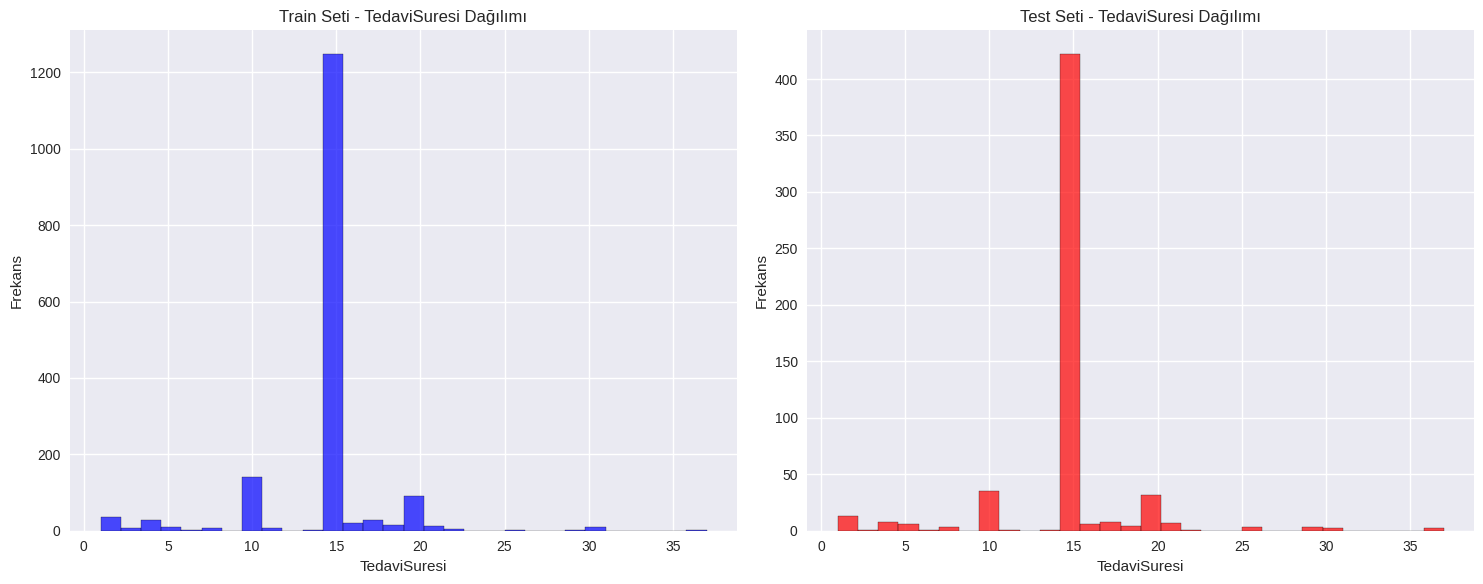

In [74]:
# Hedef değişkenin train ve test setlerindeki dağılımını kontrol etme
print('Hedef Değişken Dağılım Karşılaştırması:')
print(f'\nTrain seti - {target_col}:')
print(f'  Ortalama: {y_train.mean():.2f}')
print(f'  Medyan: {y_train.median():.2f}')
print(f'  Std: {y_train.std():.2f}')
print(f'  Min: {y_train.min():.2f}')
print(f'  Max: {y_train.max():.2f}')

print(f'\nTest seti - {target_col}:')
print(f'  Ortalama: {y_test.mean():.2f}')
print(f'  Medyan: {y_test.median():.2f}')
print(f'  Std: {y_test.std():.2f}')
print(f'  Min: {y_test.min():.2f}')
print(f'  Max: {y_test.max():.2f}')

# Train ve test setlerinin dağılımını görselleştirme
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Train seti histogram
axes[0].hist(y_train, bins=30, alpha=0.7, color='blue', edgecolor='black')
axes[0].set_title(f'Train Seti - {target_col} Dağılımı')
axes[0].set_xlabel(target_col)
axes[0].set_ylabel('Frekans')

# Test seti histogram
axes[1].hist(y_test, bins=30, alpha=0.7, color='red', edgecolor='black')
axes[1].set_title(f'Test Seti - {target_col} Dağılımı')
axes[1].set_xlabel(target_col)
axes[1].set_ylabel('Frekans')

plt.tight_layout()
plt.show()

## 12. Final Veri Setinin Kayıt Edilmesi

In [75]:
# İşlenmiş veri setini kaydetme
# Train ve test setlerini ayrı ayrı kaydetme
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

# Dosyaları kaydetme
train_data.to_csv('processed_train_data.csv', index=False)
test_data.to_csv('processed_test_data.csv', index=False)
df_scaled.to_csv('processed_full_data.csv', index=False)

print('Veri setleri başarıyla kaydedildi:')
print('  - processed_train_data.csv (Train seti)')
print('  - processed_test_data.csv (Test seti)')
print('  - processed_full_data.csv (Tam veri seti)')

# Preprocessing pipeline'ının kaydedilmesi (gelecekte kullanım için)
import pickle

# Scaler'ı kaydetme
if numeric_features:
    with open('scaler.pkl', 'wb') as f:
        pickle.dump(scaler, f)
    print('  - scaler.pkl (StandardScaler)')

# Label encoder'ları kaydetme
if label_encoders:
    with open('label_encoders.pkl', 'wb') as f:
        pickle.dump(label_encoders, f)
    print('  - label_encoders.pkl (Label Encoders)')
    

Veri setleri başarıyla kaydedildi:
  - processed_train_data.csv (Train seti)
  - processed_test_data.csv (Test seti)
  - processed_full_data.csv (Tam veri seti)
  - scaler.pkl (StandardScaler)
  - label_encoders.pkl (Label Encoders)


## 13. EDA ve Preprocessing Özeti

In [76]:
print('=' * 60)
print('EDA VE PREPROCESSING SÜRECİ ÖZETI')
print('=' * 60)

print(f'\n1. BAŞLANGIÇ VERİ SETİ:')
print(f'   - Boyut: {df.shape}')
print(f'   - Numerik sütun sayısı: {len(numeric_columns)}')
print(f'   - Kategorik sütun sayısı: {len(categorical_columns)}')
print(f'   - Toplam eksik veri: {df.isnull().sum().sum()}')

print(f'\n2. VERİ TEMİZLEME:')
print(f'   - Eksik veri doldurma: Numerik -> Ortalama, Kategorik -> Mod')
print(f'   - Gereksiz sütun kaldırma: ID sütunları tespit edildi')

print(f'\n3. ENCODING:')
print(f'   - One-Hot Encoding: {len(low_cardinality_cols)} sütun')
print(f'   - Label Encoding: {len(high_cardinality_cols)} sütun')

print(f'\n4. NORMALİZASYON:')
print(f'   - StandardScaler uygulandı: {len(numeric_features)} numerik özellik')

print(f'\n5. TRAIN-TEST SPLIT:')
print(f'   - Train: %75 ({X_train.shape[0]} örnek)')
print(f'   - Test: %25 ({X_test.shape[0]} örnek)')
print(f'   - Özellik sayısı: {X.shape[1]}')
print(f'   - Hedef değişken: {target_col}')

print(f'\n6. ÇIKTI DOSYALARI:')
print(f'   - processed_train_data.csv')
print(f'   - processed_test_data.csv')
print(f'   - processed_full_data.csv')
print(f'   - scaler.pkl')
print(f'   - label_encoders.pkl')

print(f'\n7. SONUÇ:')
print(f'   ✓ Veri seti model eğitimi için hazır!')
print(f'   ✓ Eksik veri kalmadı: {df_final.isnull().sum().sum() == 0}')
print(f'   ✓ Tüm kategorik veriler encode edildi')
print(f'   ✓ Numerik veriler standartlaştırıldı')
print(f'   ✓ Train-test ayrımı yapıldı')

print('\n' + '=' * 60)
print('İŞLEM BAŞARIYLA TAMAMLANDI!')
print('=' * 60)

EDA VE PREPROCESSING SÜRECİ ÖZETI

1. BAŞLANGIÇ VERİ SETİ:
   - Boyut: (2235, 13)
   - Numerik sütun sayısı: 3
   - Kategorik sütun sayısı: 10
   - Toplam eksik veri: 2706

2. VERİ TEMİZLEME:
   - Eksik veri doldurma: Numerik -> Ortalama, Kategorik -> Mod
   - Gereksiz sütun kaldırma: ID sütunları tespit edildi

3. ENCODING:
   - One-Hot Encoding: 5 sütun
   - Label Encoding: 5 sütun

4. NORMALİZASYON:
   - StandardScaler uygulandı: 7 numerik özellik

5. TRAIN-TEST SPLIT:
   - Train: %75 (1676 örnek)
   - Test: %25 (559 örnek)
   - Özellik sayısı: 42
   - Hedef değişken: TedaviSuresi

6. ÇIKTI DOSYALARI:
   - processed_train_data.csv
   - processed_test_data.csv
   - processed_full_data.csv
   - scaler.pkl
   - label_encoders.pkl

7. SONUÇ:
   ✓ Veri seti model eğitimi için hazır!
   ✓ Eksik veri kalmadı: True
   ✓ Tüm kategorik veriler encode edildi
   ✓ Numerik veriler standartlaştırıldı
   ✓ Train-test ayrımı yapıldı

İŞLEM BAŞARIYLA TAMAMLANDI!
